# Heart Failure Analysis
Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://final-project.super.site/)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page

## The story behind The Data

Cardiovascular diseases (CVDs) are the number 1 cause of death all over the world, taking an estimated **17.9** million lives each year, which accounts for 31% of all deaths worldwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure, as well as analyze and understand the main factor for these diseases.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with CV disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a great analysis of it can be of great help.

**A full ERD can be found [here](https://dbdiagram.io/d/638ce6b2bae3ed7c4544a01b)**

# Data Description
In this task, few datasets are provided:

1. **`base_metrics_patient.csv`** - the base DF which contains the main metrics measured per each patient, these are:
 
	- `uniqueID` - patient ID
	- `smoking` - If the patient smokes or not (boolean)
    - `ejection_fraction` - Percentage of blood leaving the heart at each contraction (%)
	- `serum_sodium` - Level of serum sodium in the blood (mEq/L)
	- `platelets` - Platelets in the blood (kiloplatelets/mL)
	- `creatinine_phosphokinase` - Level of the CPK enzyme in the blood (mcg/L)
	- `diabetes` - If the patient has diabetes (boolean)
	- `serum_creatinine` - Level of serum creatinine in the blood (mg/dL)
2. **`blood_metrics_df.csv`** - an additional dataset contains some more metrics about each patient. Specifically, it contains:
    - `uniqueID` - patient ID
    - `anaemia` - Decrease of red blood cells or hemoglobin (boolean)
    - `high_blood_pressure` - If the patient has hypertension (boolean)
3. **`demographic_data_health.csv`** - some extra data about the patient’s demographics, specifically:
    - `uniqueID` - patient ID
    - `age` - patient’s age
    - `sex` - (male - 1, female - 0)
4. **`follow_up_df.csv` -** a dataset contains details about a follow up check that was with that patient. It contains:
    - `uniqueID` - patient ID
    - `time` - time passed (in days) between the measurement date (see dataset #1) until that “follow up” date
    - `DEATH_EVENT` - If the patient deceased during the follow-up period (boolean)

# SQL tasks

1. How many death cases do we have in this dataset?
2. Per each sex (M, F), show the amount of “death” records in the data
3. Calculate the following statistics for serum_creatinine, per each anaemia category -
    1. min, max, average, range
4. Let’s define a new metric - almost_outlier. An “almost_outlier” is a value which its serum_creatinine is higher than the overall serum_creatinine average, by 1.5. How many “almost_outlier” do we have in our dataset?**  
5. Per each gender + smoker category, find out the min, max and mean of creatinine_phosphokinase
6. Let’s define a new variable called age_group:
    1. 10 < x ≤ 50
    2. 50 < x ≤ 70
    3. 70 < x ≤ 80
    4. 80 < x ≤ 120
    
    Per each age_group, find out:
    
    - Out of persons in each group, what’s the % of smokers are there. Make sure to round the answer up to 4 decimal points
    - how many patients with high_blood_pressure out there
    - what is the avg. level of serum_sodium. Make sure to round the answer up to 4 decimal points
7. Using the age_group column from above, some hospitals are interested to know who are the top 10 patient ID with the highest serum_creatinine. Help them find that information

8. Let’s create a new variable called “general_serum”, composed of a multiplication between serum_sodium and serum_creatinine, and divided by 100 (a_multiply_b / 100). Once created, per each smoking + diabetes level (boolean variable), some hospitals would like to know the patient IDs with the lowest level of that new metric. As such, please generate a table of smoking + diabetes, as well as the bottom 5 patient IDs, with the lowest level of “general_serum”

## Tableau tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualisations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - % of patients that died
    - % of smokers out of patients that died
    - % of smokers out of patients that died older than 70 y/o
    - etc.
2. **A Bar Chart**, for example, comparing one or more patient characteristics and the corresponding amount of patients who died or didn’t die, smoker or non-smokers, diabetic or not diabetic. 
3. **A Bar Chart using Quick Table Calculation**, for example, for each combination of patient characteristics comparing the % of smokers and non-smokers, patients that die or didn’t die, etc.
4. **A Highlight Table (Heatmap)**, for example, between age group and smoking flag, where each cell corresponds to either absolute or % of Total patients. By building two such heatmaps you can compare the “distribution” for patients that die and didn’t die.
5. **A Top N list of patient IDs** based on a chosen metric (creatine levels, sodium levels, etc.) including various Context Filters (age, smoker, etc.). 
6. **A Top N list of patient segments** by the % of deaths. For example, out of all non-diabetic smokers with high blood pressure, what percentage of patients died? Sort the segments by this percentage descendingly and allow for selecting Top N, if relevant, or keep the full list, if you see fit.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard.
8. At least **1 more visualization of your choice** adding value to your analysis.

In [14]:
-- Start writing your SQL query here 
--1.How many death cases do we have in this dataset?
select COUNT(death_event) 
from follow_up_df 













,count
0,299


In [3]:
--2.Per each sex (M, F), show the amount of “death” records in the data - Male
select COUNT(sex)
FROM demographic_data as d
JOIN follow_up_df as f
ON d.uniqueid = f.uniqueid
where sex =1 


,count
0,194


In [4]:
--Female
select COUNT(sex)
FROM demographic_data as d
JOIN follow_up_df as f
ON d.uniqueid = f.uniqueid
WHERE sex = 0

,count
0,105


In [7]:
--3.Calculate the following statistics for serum_creatinine, per each anaemia category -
--min, max, average, range
select  min(serum_creatinine), max(serum_creatinine), avg(serum_creatinine),max(serum_creatinine)-min(serum_creatinine) as range
from blood_metrics_df as bm
join base_metrics_patient as bmp
ON bm.uniqueid = bmp.uniqueid
WHERE anaemia = 1



,min,max,avg,range
0,0.6,9.4,1.455736,8.8


In [6]:

select  min(serum_creatinine), max(serum_creatinine), avg(serum_creatinine),max(serum_creatinine)-min(serum_creatinine) as range
from blood_metrics_df as bm
join base_metrics_patient as bmp
ON bm.uniqueid = bmp.uniqueid
WHERE anaemia = 0


,min,max,avg,range
0,0.5,6.8,1.346941,6.3


In [8]:
--4.Let’s define a new metric - almost_outlier. An “almost_outlier” is a value which its serum_creatinine is higher than the overall --serum_creatinine average, by 1.5. How many “almost_outlier” do we have in our dataset?**

select avg(serum_creatinine)/1.5 as almost_outlier
from base_metrics_patient



,almost_outlier
0,0.929253


In [11]:

select min(creatinine_phosphokinase),max(creatinine_phosphokinase),avg(creatinine_phosphokinase)/count(bmp.uniqueid) as mean
from base_metrics_patient bmp
join demographic_data dd
on bmp.uniqueid = dd.uniqueid
WHERE smoking = 1 AND sex = 1

,min,max,mean
0,47,5882,6.543006


In [12]:
--7. Using the age_group column from above, some hospitals are interested to know who are the top 10 patient ID with the highest -----serum_creatinine. Help them find that information

select serum_creatinine, dd.uniqueid, ag.age
from demographic_data dd
join base_metrics_patient bmp
on dd.uniqueid = bmp.uniqueid
join agegroup ag
on dd.uniqueid = ag.uniqueid
order by serum_creatinine desc
limit 10 

,serum_creatinine,uniqueid,age
0,9.4,9,80
1,9.0,217,54
2,6.8,52,60
3,6.1,131,60
4,5.8,28,58
5,5.0,228,65
6,4.4,48,80
7,4.0,10,75
8,3.8,282,42
9,3.7,124,60


In [9]:
select count(uniqueid)
from base_metrics_patient
Where serum_creatinine >= .9292

,count
0,218


In [10]:
--5. Per each gender + smoker category, find out the min, max and mean of creatinine_phosphokinase

select min(creatinine_phosphokinase),max(creatinine_phosphokinase),avg(creatinine_phosphokinase)/count(bmp.uniqueid) as mean
from base_metrics_patient bmp
join demographic_data dd
on bmp.uniqueid = dd.uniqueid
WHERE smoking = 0 AND sex = 0

,min,max,mean
0,52,3964,4.828742


In [2]:
with patients as 
(
select * 
from base_metrics_patient bmp
join demographic_data dd 
on bmp.uniqueid = dd.uniqueid
join blood_metrics_df bm
on bm.uniqueid = bmp.uniqueid)
select round(100.0 *sum(smoking)/count(age),4) as smokers_percenatge, sum(high_blood_pressure) as blood_pressure, round(avg(serum_sodium), 2)as avg_soduim_level,
CASE WHEN age between 10 and 50 THEN 'young'
                      WHEN age between 50 and 70 THEN 'milddle' WHEN age between 70 and 80 THEN 'old'
                      ELSE 'very_old'
                      END AS age_bins
                      from patients
                      group by age_bins,age


,smokers_percenatge,blood_pressure,avg_soduim_level,age_bins
0,0.0000,1,135.50,milddle
1,0.0000,1,142.00,milddle
2,40.0000,3,138.20,milddle
3,100.0000,0,137.00,very_old
4,0.0000,1,133.00,old
5,33.3333,1,136.67,very_old
6,33.3333,10,136.15,young
7,0.0000,0,140.00,very_old
8,40.0000,13,137.32,milddle
9,0.0000,2,135.00,milddle


In [ ]:
--8.Let’s create a new variable called “general_serum”, composed of a multiplication between serum_sodium and serum_creatinine, and --divided by 100 (a_multiply_b / 100). Once created, per each smoking + diabetes level (boolean variable), some hospitals would like --to know the patient IDs with the lowest level of that new metric. As such, please generate a table of smoking + diabetes, as well --as the bottom 5 patient IDs, with the lowest level of “general_serum”

create view general_serum 
as
select (serum_sodium * serum_creatinine/100) as gs, smoking, diabetes,uniqueid
from base_metrics_patient



Error: --8.Let’s create a new variable called “general_serum”, composed of a multiplication between serum_sodium and serum_creatinine, and --divided by 100 (a_multiply_b / 100). Once created, per each smoking + diabetes level (boolean variable), some hospitals would like --to know the patient IDs with the lowest level of that new metric. As such, please generate a table of smoking + diabetes, as well --as the bottom 5 patient IDs, with the lowest level of “general_serum”

create view general_serum 
as
select (serum_sodium * serum_creatinine/100) as gs, smoking, diabetes,uniqueid
from base_metrics_patient

 - relation "general_serum" already exists

In [13]:
select *
from general_serum
order by general_serum 
limit 5

,?column?,smoking,diabetes
0,0.695,0,0
1,0.786,1,1
2,0.804,0,0
3,0.828,1,0
4,0.828,1,1


In [19]:
select anaemia,count(death_event)
from blood_metrics_df bm
join follow_up_df fu
on bm.uniqueid = fu.uniqueid
where anaemia = 0 and death_event=0
group by anaemia

,anaemia,count
0,0,120


In [20]:
select anaemia,count(death_event)
from blood_metrics_df bm
join follow_up_df fu
on bm.uniqueid = fu.uniqueid
where anaemia = 1 and death_event= 1
group by anaemia 

,anaemia,count
0,1,46


In [21]:
select diabetes,count(death_event)
from base_metrics_patient bm
join follow_up_df fu
on bm.uniqueid = fu.uniqueid
where diabetes = 0 and death_event=0
group by diabetes

,diabetes,count
0,0,118


In [24]:
select diabetes,count(death_event),anaemia
from base_metrics_patient bm
join follow_up_df fu
on bm.uniqueid = fu.uniqueid
join blood_metrics_df bmd
on bmd.uniqueid = fu.uniqueid
where diabetes = 1 and death_event=1 and anaemia = 1
group by diabetes ,bmd.anaemia

,diabetes,count,anaemia
0,1,18,1


In [25]:
select diabetes,count(death_event),anaemia
from base_metrics_patient bm
join follow_up_df fu
on bm.uniqueid = fu.uniqueid
join blood_metrics_df bmd
on bmd.uniqueid = fu.uniqueid
where diabetes = 1 and death_event=0 and anaemia = 1
group by diabetes ,bmd.anaemia


,diabetes,count,anaemia
0,1,35,1


_Use this cell to add your Tableau links. We encourage you also to add here screenshots from your Tableau dashboard with explanations._

https://public.tableau.com/app/profile/fatema.hyderabadwala/viz/heartfailure_16744970669610/Story1?publish=yes

_For_ deep dive analysis and EDA follow the guidelines on project [Page](https://final-project.super.site/)

In [2]:
# loading datasets and see their "head"
base_metrics_patient_df = pd.read_csv("base_metrics_patient.csv")
blood_metrics_df = pd.read_csv("blood_metrics_df.csv")
demographic_df = pd.read_csv("demographic_data_health.csv")
follow_up_df = pd.read_csv("follow_up_df.csv")



In [1]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_metrics_patient_df.head(3)
#blood_metrics_df.head(3)
#demographic_df.head(3)
#follow_up_df.head(3)

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine
0,0,20,130,265000.00,582,0,0,1.9
1,0,38,136,263358.03,7861,1,0,1.1
2,1,20,129,162000.00,146,2,0,1.3


In [4]:
# Let's see the head of base_metrics in a more visualized manner
base_metrics_patient_df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine
0,20,130,265000.000000,582,0,0,1.900000
0,38,136,263358.030000,7861,1,0,1.100000
1,20,129,162000.000000,146,2,0,1.300000
0,20,137,210000.000000,111,3,0,1.900000
0,20,116,327000.000000,160,4,1,2.700000


In [5]:
# Descriptive statistics in a more visualized way
base_metrics_patient_df.describe().T.style.background_gradient(cmap = "Reds_r").set_properties(**{"font-family" : "Segoe UI"})

,count,mean,std,min,25%,50%,75%,max
smoking,299.000000,0.321070,0.467670,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
uniqueID,299.000000,149.000000,86.458082,0.000000,74.500000,149.000000,223.500000,298.000000
diabetes,299.000000,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000


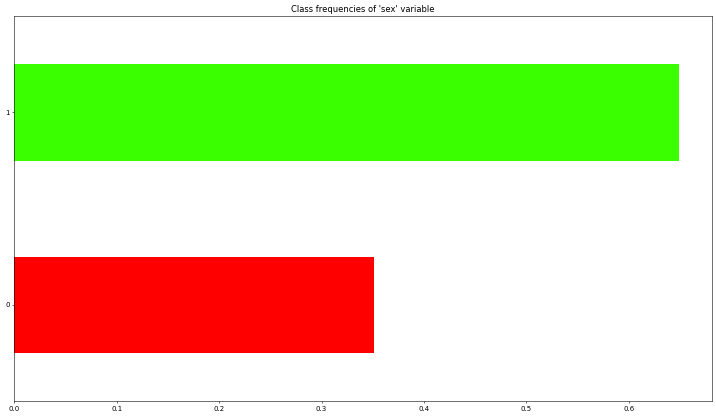

In [5]:
# Let's see the relationship between categoric variable "sex" and its frequency
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

(demographic_df["sex"].value_counts(ascending = True, normalize = True)
 .plot.barh(color= ["#FF0000", "#3AFF00"])
 .set_title("Class frequencies of 'sex' variable"));

# Q: Why do we have values besides 1 / 0 ???

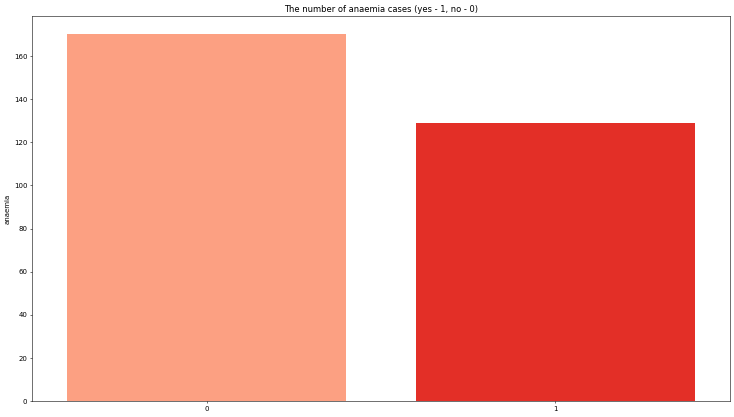

In [97]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

sns.barplot(x = blood_metrics_df["anaemia"].value_counts().index,
            y = blood_metrics_df["anaemia"].value_counts(),
            data = blood_metrics_df, palette = "Reds",
            saturation = 1).set(title = "The number of anaemia cases (yes - 1, no - 0)");

# It can be seen from this graph that the presence of anemia is less than the absence
# Why do we have other values?

In [5]:
base_metrics_patient_df.describe()


,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine
count,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,0.32107,38.083612,136.625418,263358.029264,581.839465,149.000000,0.418060,1.39388
std,0.46767,11.834841,4.412477,97804.236869,970.287881,86.458082,0.494067,1.03451
min,0.00000,14.000000,113.000000,25100.000000,23.000000,0.000000,0.000000,0.50000
25%,0.00000,30.000000,134.000000,212500.000000,116.500000,74.500000,0.000000,0.90000
50%,0.00000,38.000000,137.000000,262000.000000,250.000000,149.000000,0.000000,1.10000
75%,1.00000,45.000000,140.000000,303500.000000,582.000000,223.500000,1.000000,1.40000
max,1.00000,80.000000,148.000000,850000.000000,7861.000000,298.000000,1.000000,9.40000


In [8]:
blood_metrics_df.describe()

,unqiueID,anaemia,high_blood_pressure
count,299.000000,299.000000,299.000000
mean,149.000000,0.431438,0.351171
std,86.458082,0.496107,0.478136
min,0.000000,0.000000,0.000000
25%,74.500000,0.000000,0.000000
50%,149.000000,0.000000,0.000000
75%,223.500000,1.000000,1.000000
max,298.000000,1.000000,1.000000


In [9]:
demographic_df.describe()

,uniqueID,age,sex
count,299.000000,299.000000,299.000000
mean,149.000000,60.833893,0.648829
std,86.458082,11.894809,0.478136
min,0.000000,40.000000,0.000000
25%,74.500000,51.000000,0.000000
50%,149.000000,60.000000,1.000000
75%,223.500000,70.000000,1.000000
max,298.000000,95.000000,1.000000


In [10]:
follow_up_df.describe()

,uniqueID,time,DEATH_EVENT
count,299.000000,299.000000,299.00000
mean,149.000000,130.260870,0.32107
std,86.458082,77.614208,0.46767
min,0.000000,4.000000,0.00000
25%,74.500000,73.000000,0.00000
50%,149.000000,115.000000,0.00000
75%,223.500000,203.000000,1.00000
max,298.000000,285.000000,1.00000


In [4]:
join1=pd.merge(follow_up_df,demographic_df,on='uniqueID')
join1

,uniqueID,time,DEATH_EVENT,age,sex
0,0,4,1,75.0,1
1,1,6,1,55.0,1
2,2,7,1,65.0,1
3,3,7,1,50.0,1
4,4,8,1,65.0,0
...,...,...,...,...,...
294,294,270,0,62.0,1
295,295,271,0,55.0,0
296,296,278,0,45.0,0
297,297,280,0,45.0,1


In [5]:
join2= base_metrics_patient_df.merge(blood_metrics_df,left_on='uniqueID', right_on='unqiueID')
join2

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine,unqiueID,anaemia,high_blood_pressure
0,0,20,130,265000.00,582,0,0,1.9,0,0,1
1,0,38,136,263358.03,7861,1,0,1.1,1,0,0
2,1,20,129,162000.00,146,2,0,1.3,2,0,0
3,0,20,137,210000.00,111,3,0,1.9,3,1,0
4,0,20,116,327000.00,160,4,1,2.7,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
294,1,38,143,155000.00,61,294,1,1.1,294,0,1
295,0,38,139,270000.00,1820,295,0,1.2,295,0,0
296,0,60,138,742000.00,2060,296,1,0.8,296,0,0
297,1,38,140,140000.00,2413,297,0,1.4,297,0,0


In [6]:
join3=join1.merge(join2,on='uniqueID')
join3

,uniqueID,time,DEATH_EVENT,age,sex,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,unqiueID,anaemia,high_blood_pressure
0,0,4,1,75.0,1,0,20,130,265000.00,582,0,1.9,0,0,1
1,1,6,1,55.0,1,0,38,136,263358.03,7861,0,1.1,1,0,0
2,2,7,1,65.0,1,1,20,129,162000.00,146,0,1.3,2,0,0
3,3,7,1,50.0,1,0,20,137,210000.00,111,0,1.9,3,1,0
4,4,8,1,65.0,0,0,20,116,327000.00,160,1,2.7,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,270,0,62.0,1,1,38,143,155000.00,61,1,1.1,294,0,1
295,295,271,0,55.0,0,0,38,139,270000.00,1820,0,1.2,295,0,0
296,296,278,0,45.0,0,0,60,138,742000.00,2060,1,0.8,296,0,0
297,297,280,0,45.0,1,1,38,140,140000.00,2413,0,1.4,297,0,0


In [9]:
# null values
join3.isnull().sum()

uniqueID                    0
time                        0
DEATH_EVENT                 0
age                         0
sex                         0
smoking                     0
ejection_fraction           0
serum_sodium                0
platelets                   0
creatinine_phosphokinase    0
diabetes                    0
serum_creatinine            0
unqiueID                    0
anaemia                     0
high_blood_pressure         0
dtype: int64

In [15]:
#still checking
missing_value=["N/a","na",np.nan]
missing_value
fa=pd.read_csv("base_metrics_patient.csv",na_values=missing_value)
fa.isnull().sum()

smoking                     0
ejection_fraction           0
serum_sodium                0
platelets                   0
creatinine_phosphokinase    0
uniqueID                    0
diabetes                    0
serum_creatinine            0
dtype: int64

<AxesSubplot: xlabel='smoking', ylabel='Count'>

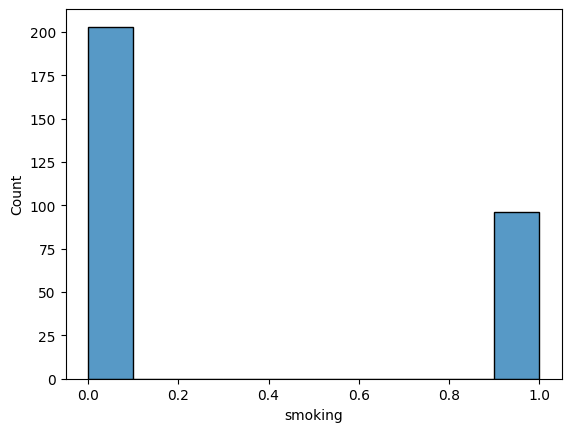

In [16]:
#Distribution Analysis-smoking
sns.histplot(data=base_metrics_patient_df,x='smoking')

More people are not smoking than smoking

<AxesSubplot: xlabel='platelets', ylabel='Count'>

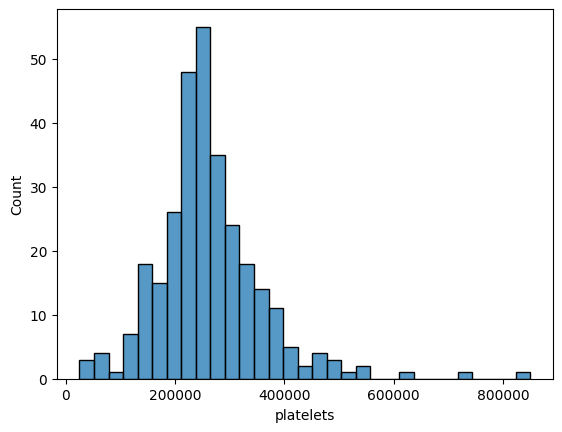

In [18]:
#Platelets
sns.histplot(data=base_metrics_patient_df,x='platelets')

Platelets count between 300000

<AxesSubplot: xlabel='serum_sodium'>

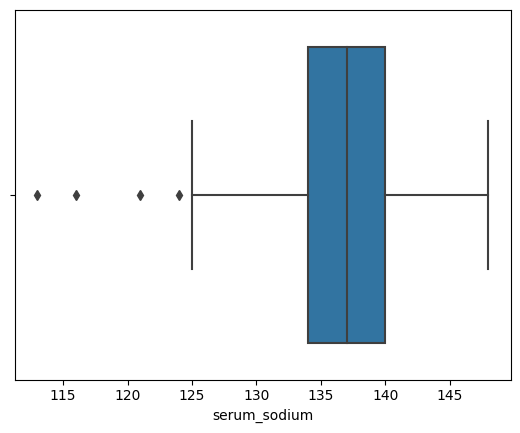

In [19]:
#Serum Sodium
sns.boxplot(data=base_metrics_patient_df,x='serum_sodium')

Maximum couts are between 135-140

<AxesSubplot: xlabel='creatinine_phosphokinase'>

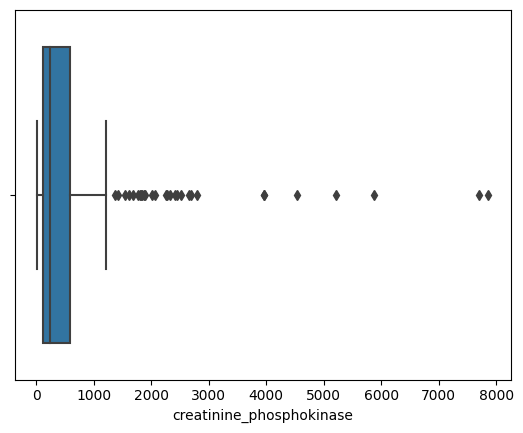

In [20]:
#Creatinine phosphokinase
sns.boxplot(data=base_metrics_patient_df,x='creatinine_phosphokinase')

Looks like an outlier

<AxesSubplot: xlabel='serum_creatinine', ylabel='Count'>

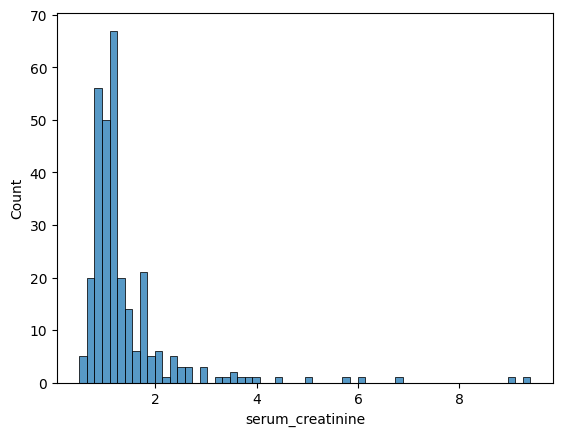

In [21]:
#Serum Creatinine
sns.histplot(data=base_metrics_patient_df,x='serum_creatinine')

Serum creatinine 1-2 levels

<AxesSubplot: xlabel='age', ylabel='Count'>

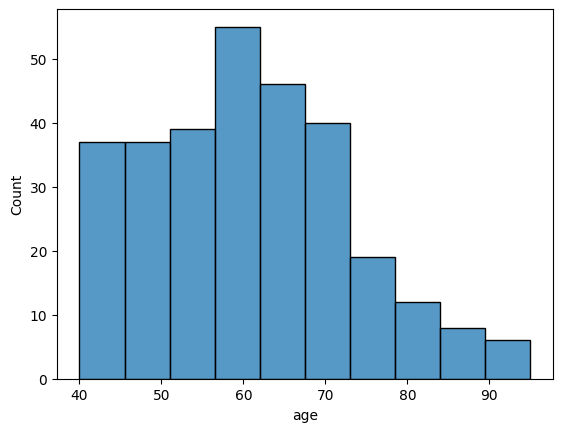

In [22]:
#age groups
sns.histplot(data=demographic_df,x='age')

Maximum age agroup is 60-65

<AxesSubplot: xlabel='time', ylabel='Count'>

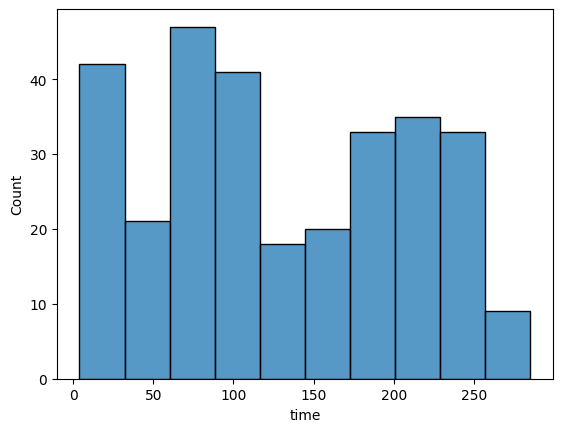

In [23]:
#time of death
sns.histplot(data=follow_up_df,x='time')

<AxesSubplot: xlabel='sex', ylabel='Count'>

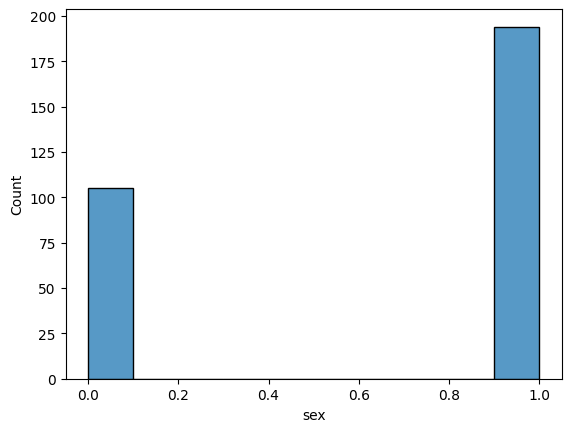

In [10]:
#gender
sns.histplot(data=demographic_df,x='sex')

More male than female

<AxesSubplot: xlabel='diabetes', ylabel='Count'>

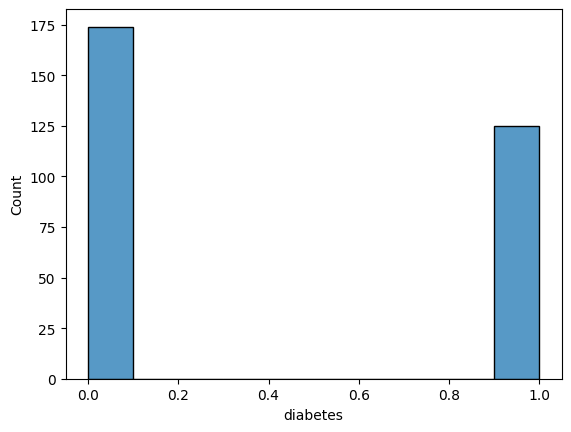

In [123]:
#diabetes
sns.histplot(data=base_metrics_patient_df,x='diabetes')

Maximum counts for non diabetic

<AxesSubplot: xlabel='smoking', ylabel='Count'>

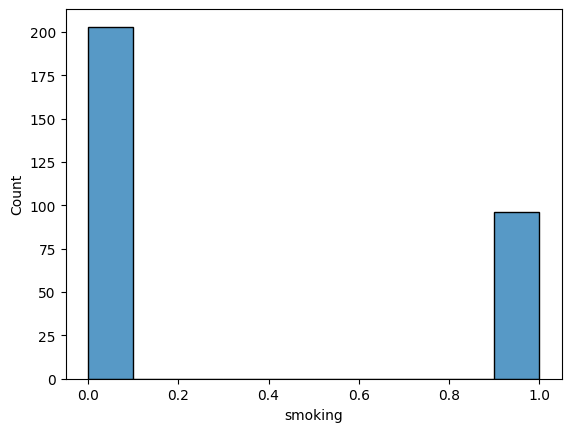

In [124]:
sns.histplot(data=base_metrics_patient_df,x='smoking')

<AxesSubplot: xlabel='high_blood_pressure', ylabel='Count'>

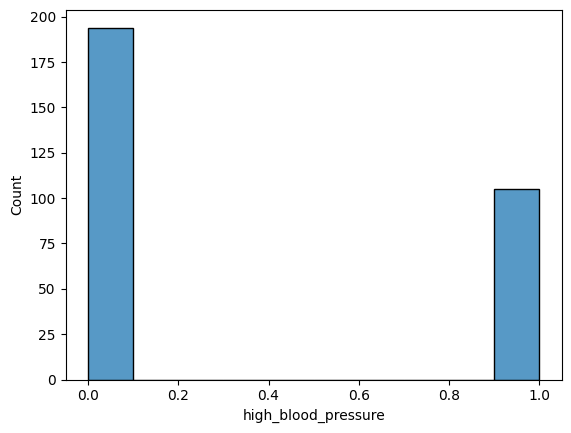

In [125]:
sns.histplot(data=blood_metrics_df,x='high_blood_pressure')

<AxesSubplot: xlabel='anaemia', ylabel='Count'>

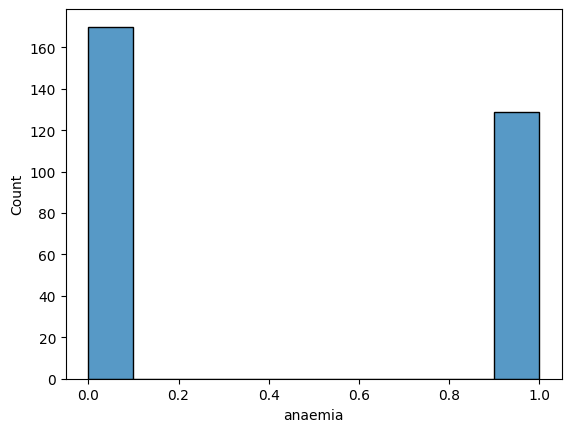

In [126]:
sns.histplot(data=blood_metrics_df,x='anaemia')

<AxesSubplot: xlabel='serum_creatinine', ylabel='uniqueID'>

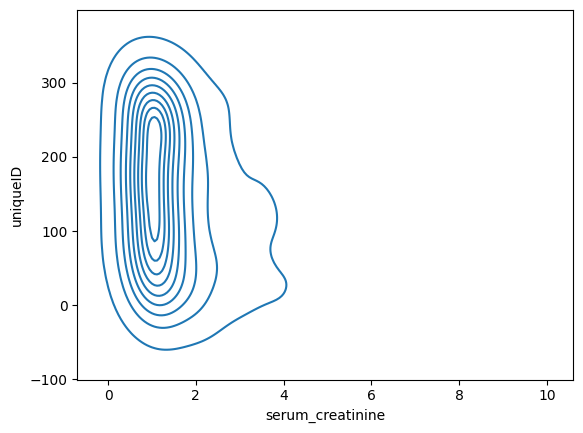

In [18]:
# What is the serum creatinine levels ?
sns.kdeplot(data=join3,x='serum_creatinine', y='uniqueID')

Its all concentrated between 0-2

<AxesSubplot: xlabel='smoking', ylabel='serum_creatinine'>

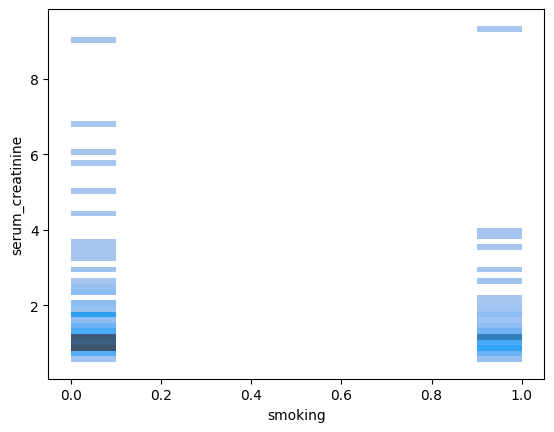

In [24]:
sns.histplot(data=join3, x='smoking',y='serum_creatinine')

<AxesSubplot: xlabel='smoking', ylabel='age'>

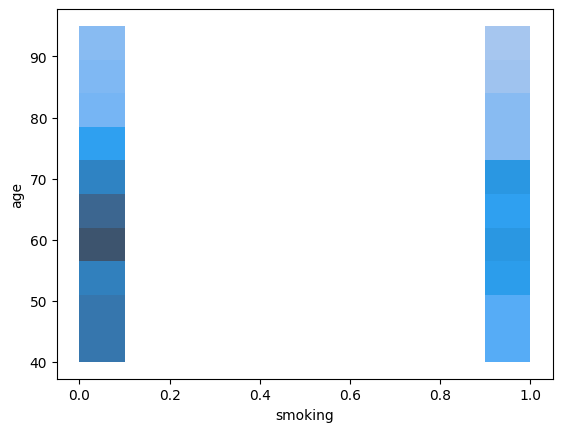

In [30]:
sns.histplot(data=join3, x='smoking', y='age')

<AxesSubplot: xlabel='sex', ylabel='smoking'>

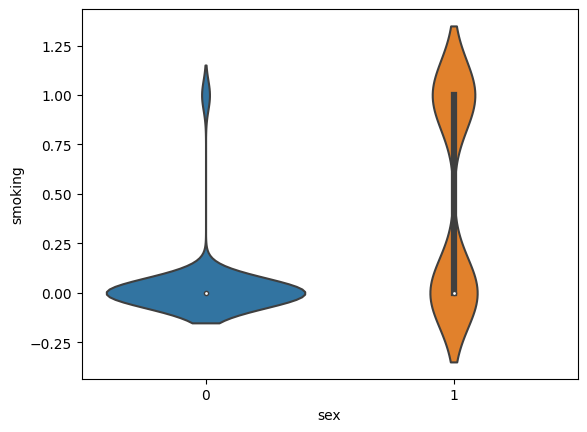

In [35]:
# Do we have more male smokers or female smokers
sns.violinplot(data=join3, x='sex', y='smoking')

There are more male smokers than female smokers

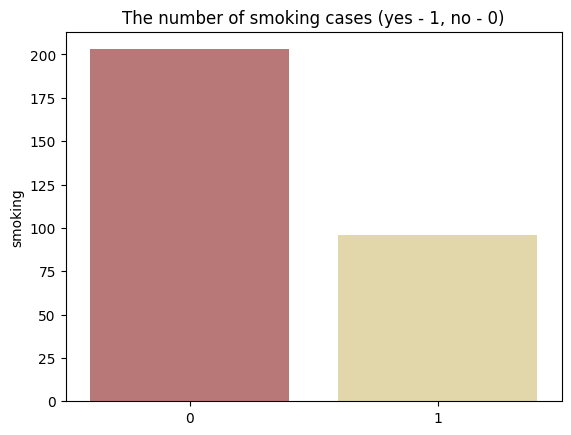

In [39]:
#Do we have more smokers or non smokers

sns.barplot(x = join3["smoking"].value_counts().index,
            y = join3["smoking"].value_counts(),
            data = blood_metrics_df, palette = "pink",
            saturation = 1).set(title = "The number of smoking cases (yes - 1, no - 0)");


Clearly more non smokers

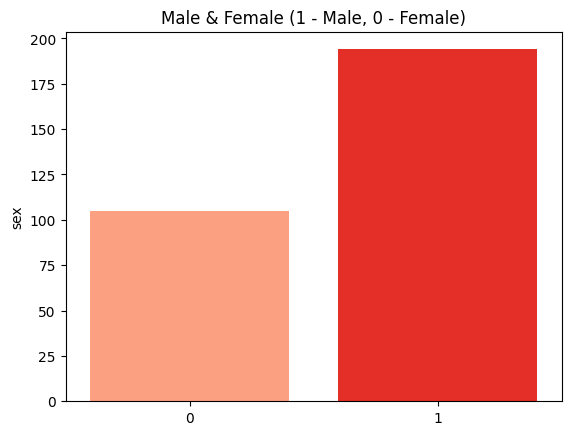

In [51]:
#Male or Female ?
sns.barplot(x = join3["sex"].value_counts().index,
            y = join3["sex"].value_counts(),
            data = blood_metrics_df, palette = "Reds",
            saturation = 1).set(title = "Male & Female (1 - Male, 0 - Female)");


Male is more

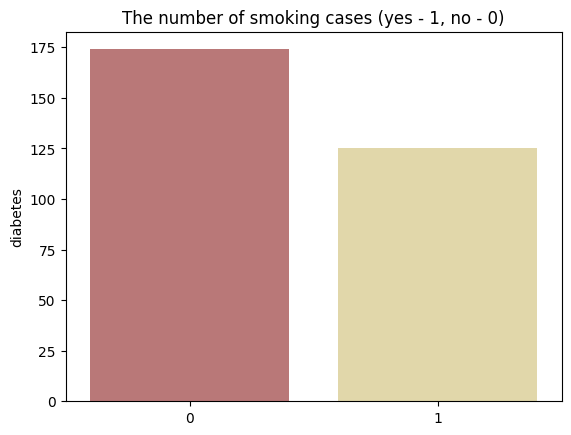

In [52]:
#Diabetic who are smokers
sns.barplot(x = join3["smoking"].value_counts().index,
            y = join3["diabetes"].value_counts(),
            data = blood_metrics_df, palette = "pink",
            saturation = 1).set(title = "The number of smoking cases have diabetes (yes - 1, no - 0)");


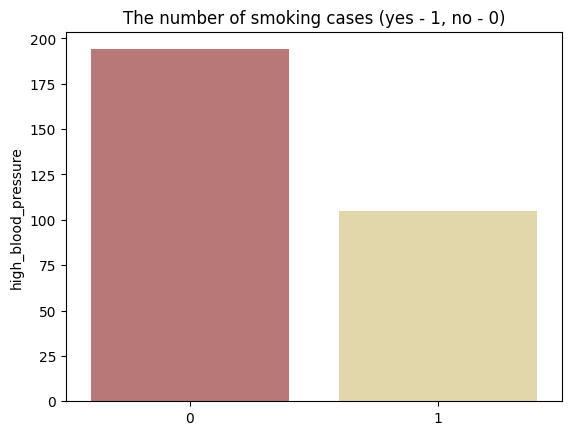

In [53]:
#smokers with high blood pressure
sns.barplot(x = join3["smoking"].value_counts().index,
            y = join3["high_blood_pressure"].value_counts(),
            data = blood_metrics_df, palette = "pink",
            saturation = 1).set(title = "The number of smoking cases (yes - 1, no - 0)");


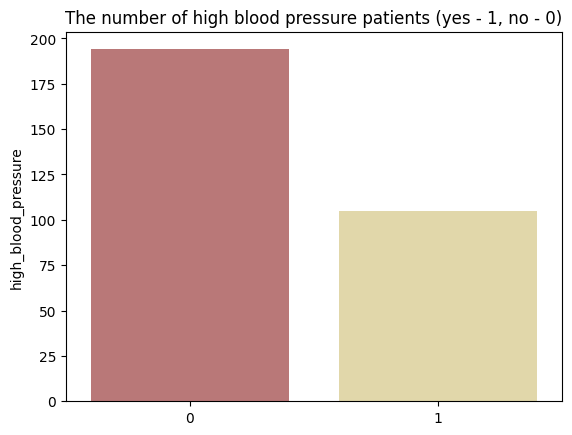

In [8]:
#Diabetic who have high blood pressure
sns.barplot(x = join3["diabetes"].value_counts().index,
            y = join3["high_blood_pressure"].value_counts(),
            data = blood_metrics_df, palette = "pink",
            saturation = 1).set(title = "The number of high blood pressure patients (yes - 1, no - 0)");


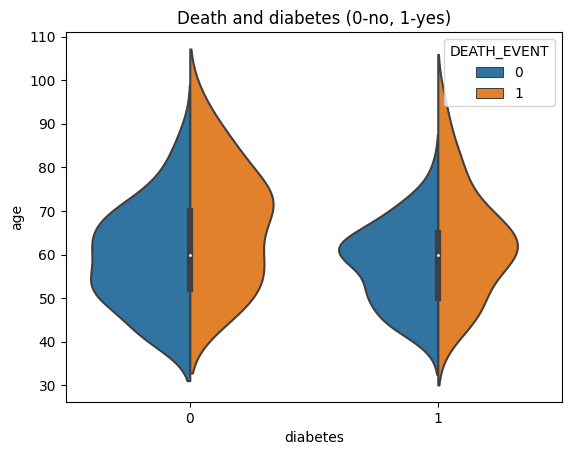

In [13]:
#age groups who have diabetes and are deceased are alive
sns.violinplot(data=join3, x="diabetes", y="age", hue="DEATH_EVENT",split=True).set(title = "Death and diabetes (0-no, 1-yes)");


<AxesSubplot: xlabel='platelets', ylabel='serum_creatinine'>

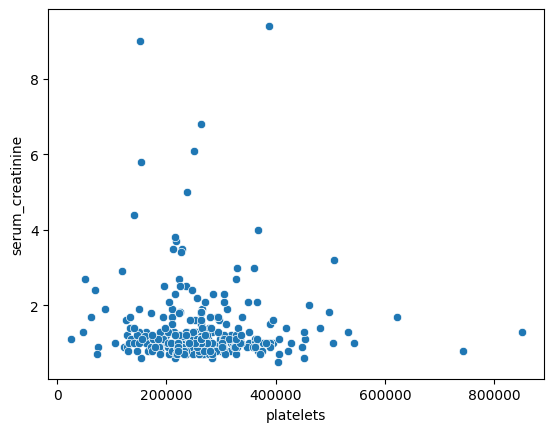

In [17]:
#platelets and serum creatinine levels
sns.scatterplot(data=join3, x="platelets", y="serum_creatinine")


<AxesSubplot: xlabel='sex', ylabel='platelets'>

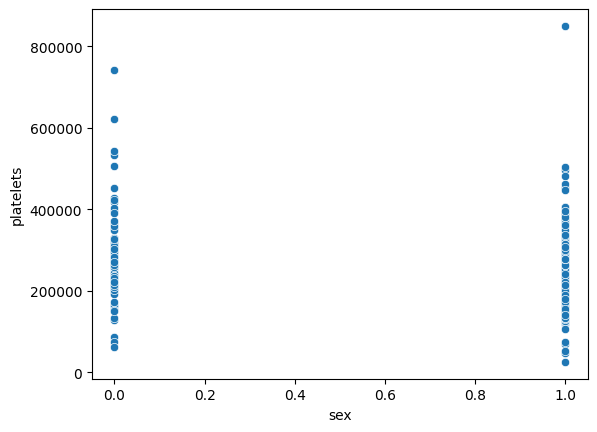

In [19]:
sns.scatterplot(data=join3, x="sex", y="platelets")

Male and female platelets count. Female is a little higher than male

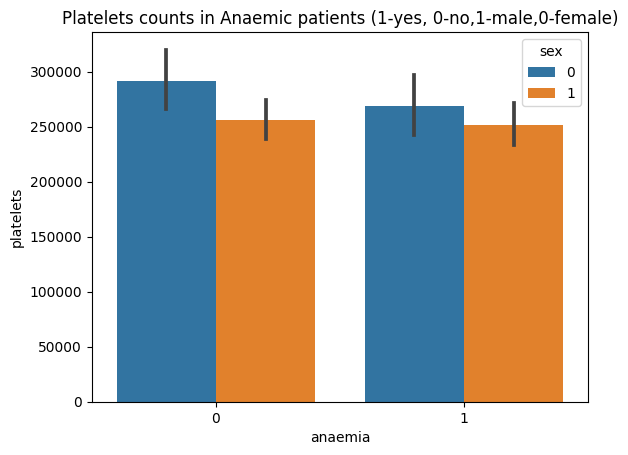

In [24]:
#Is there a difference in platellets in aneamic patients also, checking between male and female.
sns.barplot(data=join3, x="anaemia", y="platelets", hue='sex').set(title = "Platelets counts in Anaemic patients (1-yes, 0-no,1-male,0-female)");

Anaemic patients blood platelets are little lower. 


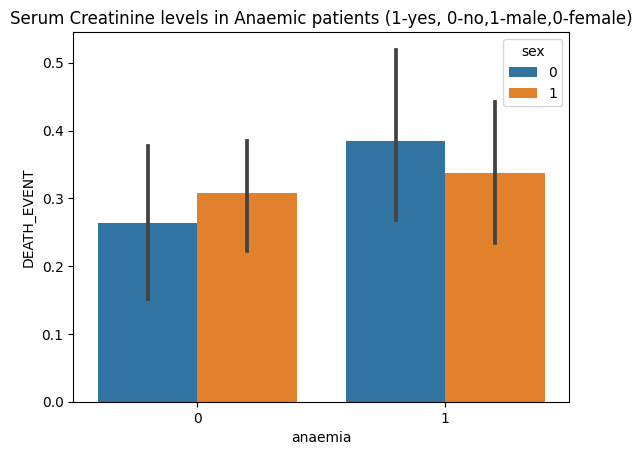

In [25]:
#serum creatinine levels in anaemic patients.
sns.barplot(data=join3, x="anaemia", y="DEATH_EVENT", hue='sex').set(title = "Serum Creatinine levels in Anaemic patients (1-yes, 0-no,1-male,0-female)");

Serum Creatinine levels are higher in anaemic patients especially male . Female there is not much change

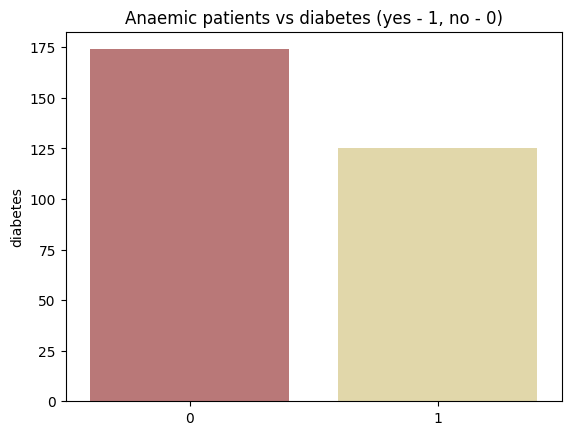

In [32]:
#Anaemic patients also diabetic
sns.barplot(x = join3["anaemia"].value_counts().index,
            y = join3["diabetes"].value_counts(),
            data = blood_metrics_df, palette = "pink",
            saturation = 1).set(title = "Anemic patients vs diabetes (yes - 1, no - 0)");


Around 110-120 patients are both anaemic and diabetic.

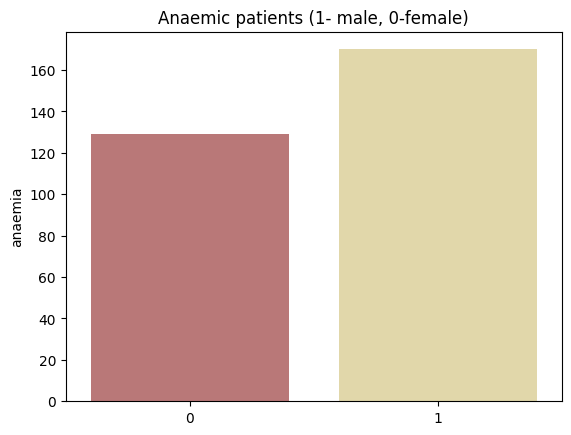

In [36]:
#How male and female are anaemic?
sns.barplot(x = join3["sex"].value_counts().index,
            y = join3["anaemia"].value_counts(),
            data = blood_metrics_df, palette = "pink",
            saturation = 1).set(title = "Anaemic patients (1- male, 0-female)");


There are more male than female .

Data Enrichment/Recommendations:

The given data is very good and its workable . But we could enrich the data by adding and merging tables .We  merge all tables and remove outliers - values which are out of the range . Also The columns as diabetes, Anaemia and blood pressure columns could have been numerical rather than binary . Numeric will give us a better understanding of each patient and give us a range as high,middle,low.
I would also include which areas these patients are coming from so it gives us a clearer picture of culture,diet lifestyle .
Very important to mention when each patients samples were taken as in what time of the day and in which season. It will give us more insight in our findings.  
Finally it should be one table with all blood makers.


Summary and Conclusions
I was working with Heart failure dataset . It has 4 tables , uniqueid was the common column and each column gave us information of the patient. Most the columns like sex,anaemia,high blood pressure were binary . This actually makes it difficult because it becomes as a yes or no answer. It is a close ended dataset in my words . 
In sql we tried to get answers about total number of patients , male and female , age groups etc . I used tableau for my visualization and Python for my deep analysis . In python we mainly used for understanding the data and charting them to compare with many attribute . It showed us gender separation , smokers or non smokers , diabetic and non diabetic . Also we had numerical data of Sodium, creatinine levels . I could see how anaemic patients were smokers , diabetic, high blood pressure , levels of creatinine. Also I could see how many male and female were anaemic .

Conclusions:
I worked and studied with anaemic patients - 
1. Anaemic patients platelets were little lower 
2. Male patietns were more anaemic compare to female 
3. There are more diabetic patients who are also anaemic 
4. The serum cretinine levels are higher in anaemic male patients compare to female
5. Female platelets count is higher compare to male (like to know about the menstruating cycle of the female)
6. Most creatinine phosphokinase levels looks like outliers  . The range is too big .


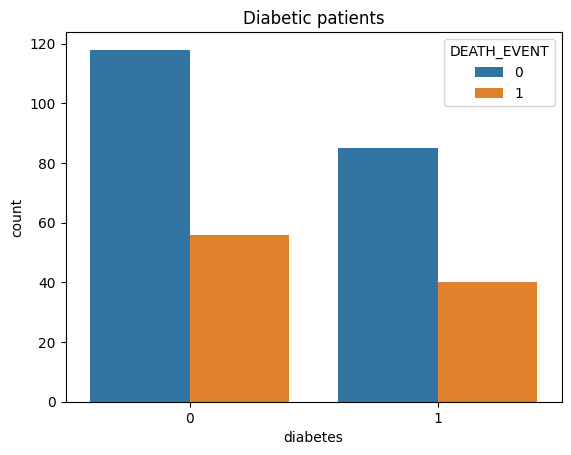

In [9]:
#age groups who have diabetes and are deceased are alive
sns.countplot(data=join3, x="diabetes", hue="DEATH_EVENT").set(title = "Diabetic patients");

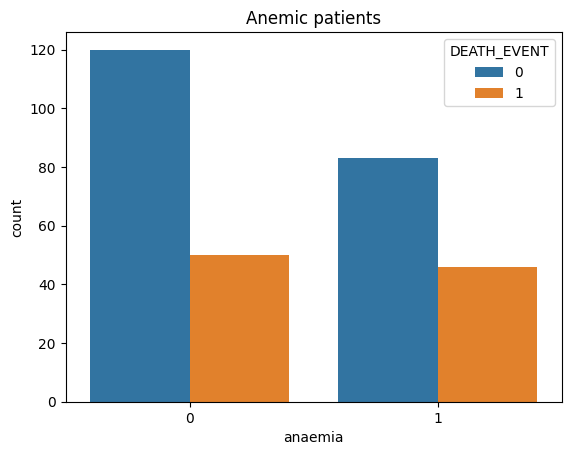

In [10]:
sns.countplot(data=join3, x="anaemia", hue="DEATH_EVENT").set(title = "Anemic patients");

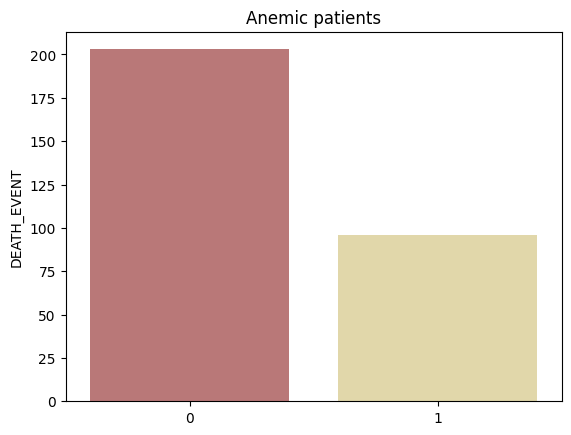

In [14]:
#How male and female are anaemic?
sns.barplot(x = join3["anaemia"].value_counts().index,
            y = join3["DEATH_EVENT"].value_counts(),
            data = blood_metrics_df, palette = "pink",
            saturation = 1).set(title = "Anemic patients");


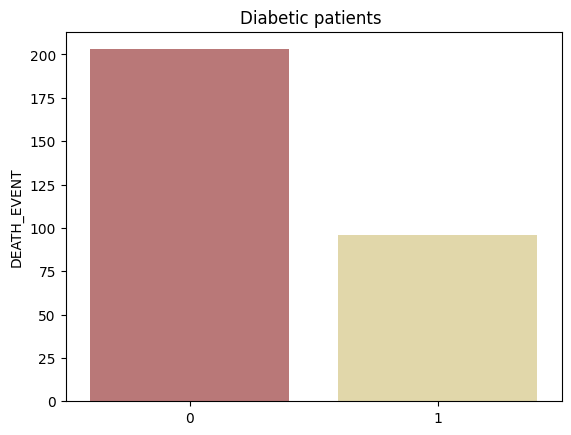

In [15]:
#How male and female are diabetic?
sns.barplot(x = join3["diabetes"].value_counts().index,
            y = join3["DEATH_EVENT"].value_counts(),
            data = blood_metrics_df, palette = "pink",
            saturation = 1).set(title = "Diabetic patients ");


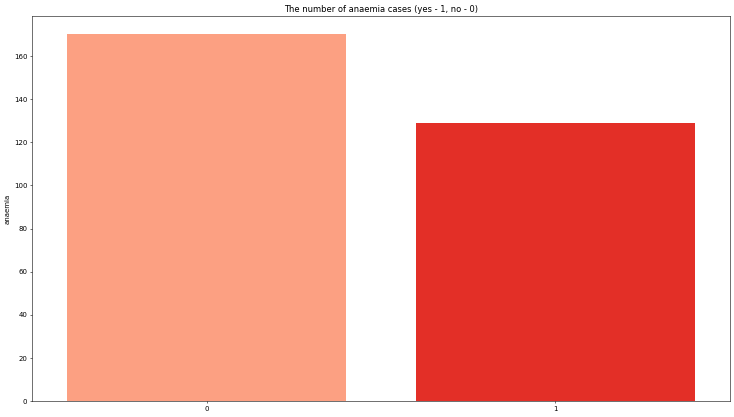

In [25]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

sns.barplot(x = blood_metrics_df["anaemia"].value_counts().index,
            y = blood_metrics_df["anaemia"].value_counts(),
            data = blood_metrics_df, palette = "Reds",
            saturation = 1).set(title = "The number of anaemia cases (yes - 1, no - 0)");

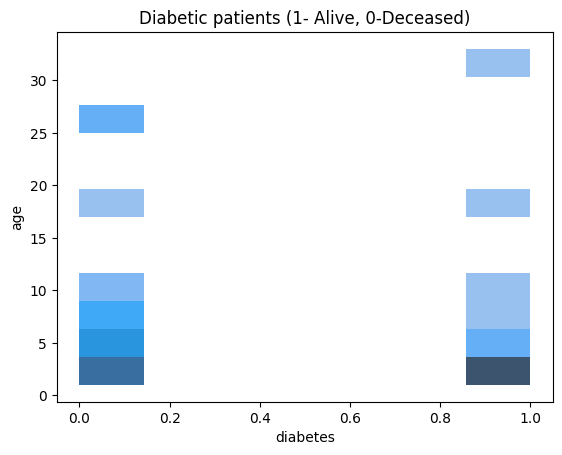